**Part 1: Unzipping the Dataset and Inspecting Files:**


We'll begin by unzipping the dataset and inspecting the extracted files. This helps us understand the structure and locate the key files required for analysis.

In [17]:
# Import necessary libraries
import zipfile
import os

# Step 1: Unzipping the dataset
def unzip_dataset(zip_file_path, extraction_path):
    """
    Unzips the given dataset into a specified directory.

    Parameters:
    - zip_file_path (str): Path to the zip file.
    - extraction_path (str): Path where the extracted files will be stored.

    Returns:
    - List of extracted files.
    """
    try:
        print("\n--- Unzipping Dataset ---")
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extraction_path)
        print("\n--- Dataset Unzipped Successfully! ---")
        return os.listdir(extraction_path)
    except Exception as e:
        print(f"Error unzipping file: {e}")
        return None

# Example Usage
zip_file_path = '/content/magic+gamma+telescope.zip'  # Replace with actual file path
extraction_path = './magic_gamma_dataset'  # Specify extraction directory
extracted_files = unzip_dataset(zip_file_path, extraction_path)

# Display the extracted files
print("\nExtracted Files:")
print(extracted_files)



--- Unzipping Dataset ---

--- Dataset Unzipped Successfully! ---

Extracted Files:
['magic04.data', 'magic04.names']



**Part 2: Loading and Inspecting the Dataset**:


After unzipping the dataset, we will now load the main data file and perform an initial inspection to understand its structure, such as column names, data types, and a preview of the content.

In [18]:
# Import necessary libraries
import pandas as pd

# Step 2: Loading and Inspecting the Dataset
def load_and_inspect_dataset(data_file_path, column_names=None):
    """
    Loads the dataset into a Pandas DataFrame and performs basic inspection.

    Parameters:
    - data_file_path (str): Path to the dataset file.
    - column_names (list): Optional list of column names if the dataset lacks headers.

    Returns:
    - dataset (pd.DataFrame): Loaded dataset as a DataFrame.
    """
    try:
        print("\n--- Loading Dataset ---")
        # Load the dataset
        dataset = pd.read_csv(data_file_path, header=None, names=column_names)

        print("\n--- Dataset Loaded Successfully! ---")

        # Display basic dataset information
        print("\n--- Dataset Info ---")
        print(dataset.info())

        # Display the first few rows of the dataset
        print("\n--- First Few Rows of the Dataset ---")
        print(dataset.head())

        return dataset
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Example Usage
data_file_path = './magic_gamma_dataset/magic04.data'  # Update this with the actual data file path
column_names = [
    "fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym",
    "fM3Long", "fM3Trans", "fAlpha", "fDist", "Class"
]  # Example column names from MAGIC Gamma dataset documentation

dataset = load_and_inspect_dataset(data_file_path, column_names=column_names)



--- Loading Dataset ---

--- Dataset Loaded Successfully! ---

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  Class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB
None

--- First Few Rows of the Dataset ---
    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773 

**Part: 03**

Splitting the Dataset

In [19]:
# Step 3: Define Features and Target
import pandas as pd

# Load the dataset
data_path = './magic_gamma_dataset/magic04.data'  # Update this path as per your file structure
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
           'fM3Trans', 'fAlpha', 'fDist', 'Class']  # Column names based on the dataset description
dataset = pd.read_csv(data_path, header=None, names=columns)

# Separate features and target
X = dataset.iloc[:, :-1]  # All columns except the last
y = dataset.iloc[:, -1]   # The last column (Class)

# Convert target labels to numeric if they are categorical
y = y.map({'g': 0, 'h': 1})  # Mapping 'g' -> 0 and 'h' -> 1 for binary classification

print("\n--- Features and Target Defined ---")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Step 4: Split the Dataset
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\n--- Dataset Split Complete ---")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")



--- Features and Target Defined ---
Features shape: (19020, 10)
Target shape: (19020,)

--- Dataset Split Complete ---
Training set shape: (13314, 10), (13314,)
Test set shape: (5706, 10), (5706,)


**Part 4: Preparing Data for Clustering**

To ensure proper clustering, we need to preprocess the dataset and focus on the features relevant for clustering (excluding any class labels).

In [20]:
# Import necessary libraries for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 4: Prepare Data for Clustering
def prepare_clustering_data(X):
    """
    Prepares data for clustering by scaling and applying PCA for dimensionality reduction.

    Parameters:
    - X: Dataset features (without labels).

    Returns:
    - X_prepared: Transformed dataset ready for clustering.
    """
    try:
        print("\n--- Preparing Data for Clustering ---")

        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Apply PCA to reduce dimensions (optional, to visualize later)
        pca = PCA(n_components=2)  # For visualization
        X_pca = pca.fit_transform(X_scaled)

        print(f"Data after PCA (2 components) - Shape: {X_pca.shape}")
        print("\n--- Data Preparation Complete! ---")
        return X_pca
    except Exception as e:
        print(f"Error during data preparation: {e}")
        return None

# Prepare the data for clustering (exclude the label column 'Class')
X_clustering = prepare_clustering_data(X_train_scaled)



--- Preparing Data for Clustering ---
Data after PCA (2 components) - Shape: (13314, 2)

--- Data Preparation Complete! ---


**Part 5: Graph-based Clustering (Subtopic 1)**


We’ll implement Spectral Clustering, a graph-based clustering method. This algorithm uses a similarity graph to find clusters.

In [16]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Step 5: Apply Spectral Clustering
def apply_spectral_clustering(X, num_clusters=2):
    """
    Applies Spectral Clustering to the dataset and evaluates its performance.

    Parameters:
    - X: Dataset features.
    - num_clusters: Number of clusters to form.

    Returns:
    - labels: Cluster labels assigned to each data point.
    - silhouette: Silhouette score of the clustering.
    """
    try:
        print("\n--- Spectral Clustering ---")

        # Initialize and fit Spectral Clustering
        spectral = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=42)
        labels = spectral.fit_predict(X)

        # Evaluate clustering
        silhouette = silhouette_score(X, labels)
        print(f"Silhouette Score: {silhouette:.4f}")
        print("\n--- Spectral Clustering Complete! ---")
        return labels, silhouette
    except Exception as e:
        print(f"Error during Spectral Clustering: {e}")
        return None, None

# Apply Spectral Clustering
spectral_labels, spectral_silhouette = apply_spectral_clustering(X_clustering, num_clusters=2)



--- Spectral Clustering ---
Silhouette Score: 0.4093

--- Spectral Clustering Complete! ---


**Step 6: K-means Clustering (Subtopic 2)**

Next, we’ll apply K-means Clustering and compare it to graph-based clustering.


In [21]:
from sklearn.cluster import KMeans

# Step 6: Apply K-means Clustering
def apply_kmeans_clustering(X, num_clusters=2):
    """
    Applies K-means Clustering to the dataset and evaluates its performance.

    Parameters:
    - X: Dataset features.
    - num_clusters: Number of clusters to form.

    Returns:
    - labels: Cluster labels assigned to each data point.
    - silhouette: Silhouette score of the clustering.
    """
    try:
        print("\n--- K-means Clustering ---")

        # Initialize and fit K-means
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        labels = kmeans.fit_predict(X)

        # Evaluate clustering
        silhouette = silhouette_score(X, labels)
        print(f"Silhouette Score: {silhouette:.4f}")
        print("\n--- K-means Clustering Complete! ---")
        return labels, silhouette
    except Exception as e:
        print(f"Error during K-means Clustering: {e}")
        return None, None

# Apply K-means Clustering
kmeans_labels, kmeans_silhouette = apply_kmeans_clustering(X_clustering, num_clusters=2)



--- K-means Clustering ---
Silhouette Score: 0.4599

--- K-means Clustering Complete! ---


Now Lets DO Comparison of both Models

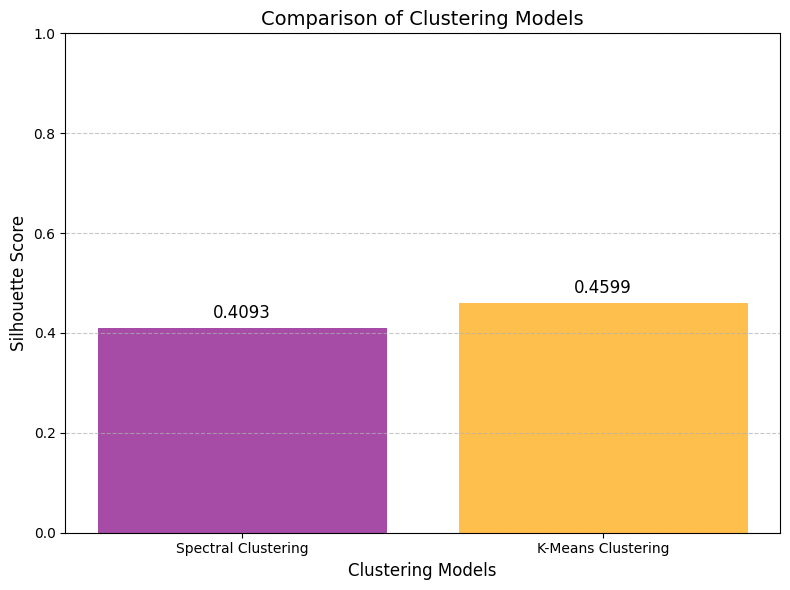

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define function to compare clustering results
def compare_clustering_models(spectral_silhouette, kmeans_silhouette):
    """
    Compare the performance of Spectral Clustering and K-Means Clustering
    based on silhouette scores.
    """
    models = ['Spectral Clustering', 'K-Means Clustering']
    silhouette_scores = [spectral_silhouette, kmeans_silhouette]

    # Plot the comparison
    plt.figure(figsize=(8, 6))
    plt.bar(models, silhouette_scores, color=['purple', 'orange'], alpha=0.7)
    plt.title("Comparison of Clustering Models", fontsize=14)
    plt.ylabel("Silhouette Score", fontsize=12)
    plt.xlabel("Clustering Models", fontsize=12)
    plt.ylim(0, 1)  # Silhouette scores are between 0 and 1
    for i, score in enumerate(silhouette_scores):
        plt.text(i, score + 0.02, f"{score:.4f}", ha='center', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage
compare_clustering_models(spectral_silhouette, kmeans_silhouette)


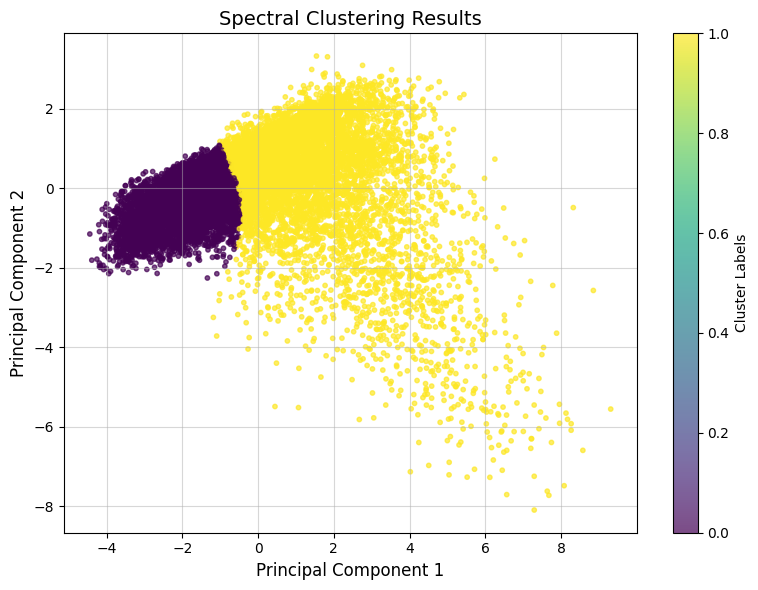

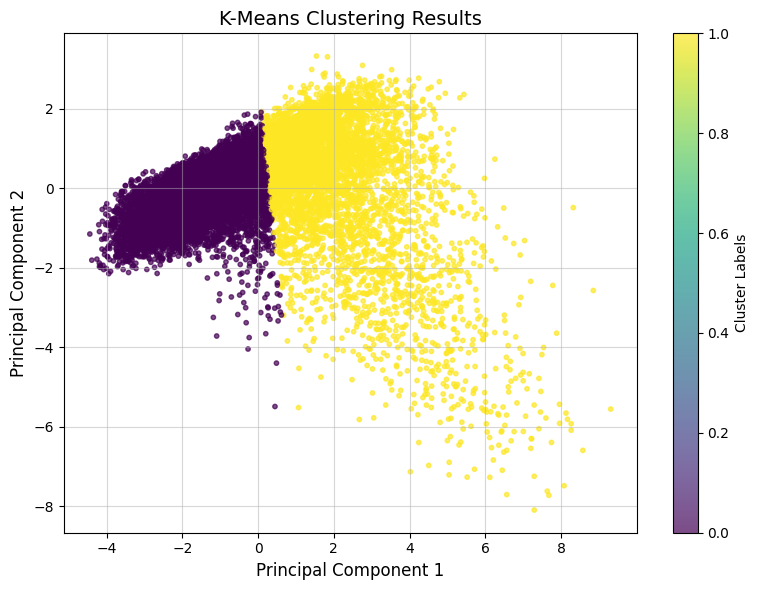

In [23]:
from sklearn.decomposition import PCA

def visualize_clusters(X, labels, title):
    """
    Visualize clustering results using 2D PCA projection.
    """
    # Reduce dataset to 2D for visualization
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # Plot clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
    plt.title(title, fontsize=14)
    plt.xlabel("Principal Component 1", fontsize=12)
    plt.ylabel("Principal Component 2", fontsize=12)
    plt.colorbar(label="Cluster Labels")
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

# Visualize Spectral Clustering Results
visualize_clusters(X_clustering, spectral_labels, "Spectral Clustering Results")

# Visualize K-Means Clustering Results
visualize_clusters(X_clustering, kmeans_labels, "K-Means Clustering Results")


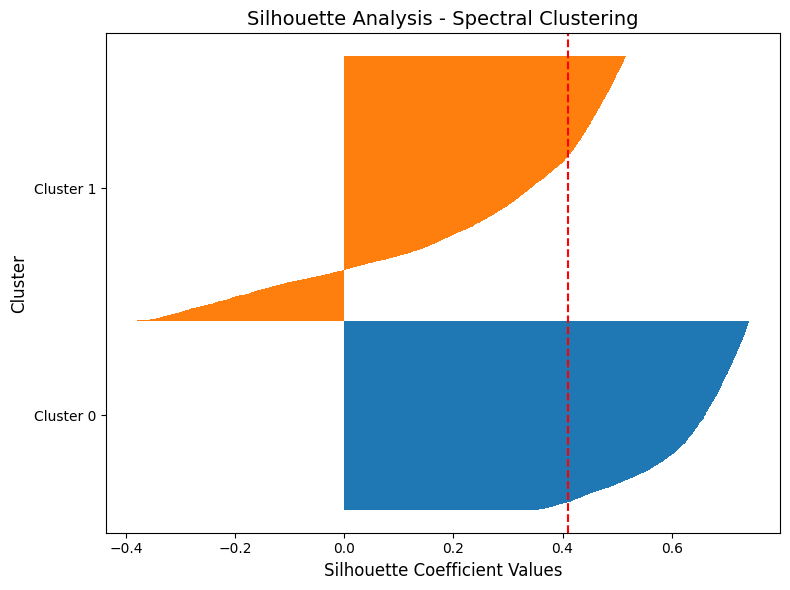

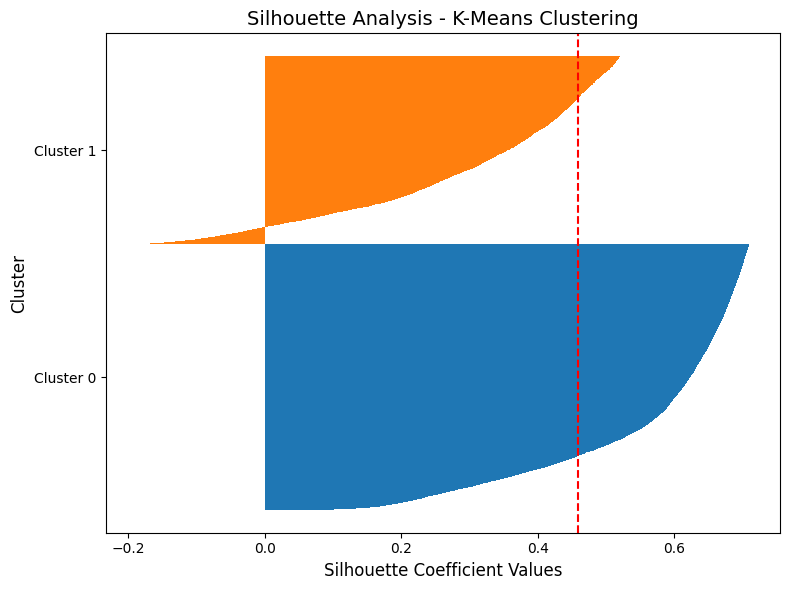

In [24]:
from sklearn.metrics import silhouette_samples

def plot_silhouette_analysis(X, labels, title):
    """
    Plot silhouette scores for a clustering model.
    """
    silhouette_vals = silhouette_samples(X, labels)
    y_ticks = []
    y_lower, y_upper = 0, 0

    plt.figure(figsize=(8, 6))
    for i in range(len(np.unique(labels))):
        cluster_silhouette_vals = silhouette_vals[labels == i]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0)
        y_ticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)

    plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
    plt.yticks(y_ticks, [f"Cluster {i}" for i in range(len(np.unique(labels)))])
    plt.xlabel("Silhouette Coefficient Values", fontsize=12)
    plt.ylabel("Cluster", fontsize=12)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot Silhouette Analysis for Spectral Clustering
plot_silhouette_analysis(X_clustering, spectral_labels, "Silhouette Analysis - Spectral Clustering")

# Plot Silhouette Analysis for K-Means Clustering
plot_silhouette_analysis(X_clustering, kmeans_labels, "Silhouette Analysis - K-Means Clustering")
